<a href="https://colab.research.google.com/github/mahatasourav/Env_impact_on_CO2_Project/blob/main/Env_impact_on_CO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environmental Impact on CO2 emission in the world

**About this file**\
The impact of greenhouse gas emissions, particularly carbon dioxide (CO2), on the earth's climate has become an increasingly important issue in recent years. CO2 emissions are produced by a variety of human activities, including the burning of fossil fuels, deforestation, and industrial processes. Understanding how much CO2 each country is emitting is crucial in developing effective climate policies and mitigating the effects of climate change.

The CO2 emissions dataset provides a comprehensive overview of the amount of CO2 emitted by each country. The dataset includes information on CO2 emissions by country from 1960 to the present day. It covers all countries in the world and is compiled from various sources, including the United Nations Framework Convention on Climate Change (UNFCCC) and the International Energy Agency (IEA).

The dataset can be used by researchers, policymakers, and the general public to gain insight into the relative contributions of different countries to global CO2 emissions. It can also be used to monitor changes in emissions over time and to assess the effectiveness of climate policies.

Overall, the CO2 emissions dataset is an important resource for understanding the global climate challenge and for developing strategies to mitigate the impact of CO2 emissions on our planet.

In [13]:
# Importing Needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df_co2 = pd.read_csv('co2_emissions_kt_by_country.csv')
# Display the first few rows of the DataFrame
print(df_co2.head())

  country_code country_name  year      value
0          ABW        Aruba  1960  11092.675
1          ABW        Aruba  1961  11576.719
2          ABW        Aruba  1962  12713.489
3          ABW        Aruba  1963  12178.107
4          ABW        Aruba  1964  11840.743


In [15]:
# Check the data types of the columns
print(df_co2.dtypes)

country_code     object
country_name     object
year              int64
value           float64
dtype: object


In [16]:
# Check basic statistical information of the numerical columns
print(df_co2.describe())

               year         value
count  13953.000000  1.395300e+04
mean    1990.732316  8.254983e+05
std       17.187585  2.788923e+06
min     1960.000000 -8.067400e+01
25%     1976.000000  1.100000e+03
50%     1992.000000  1.390000e+04
75%     2006.000000  1.642779e+05
max     2019.000000  3.434401e+07


In [17]:
df_co2['year'] = pd.to_datetime(df_co2['year'], format='%Y')


# Check the data types of the columns
print(df_co2.dtypes)

# Check basic statistical information of the numerical columns
print(df_co2.describe())

country_code            object
country_name            object
year            datetime64[ns]
value                  float64
dtype: object
              value
count  1.395300e+04
mean   8.254983e+05
std    2.788923e+06
min   -8.067400e+01
25%    1.100000e+03
50%    1.390000e+04
75%    1.642779e+05
max    3.434401e+07


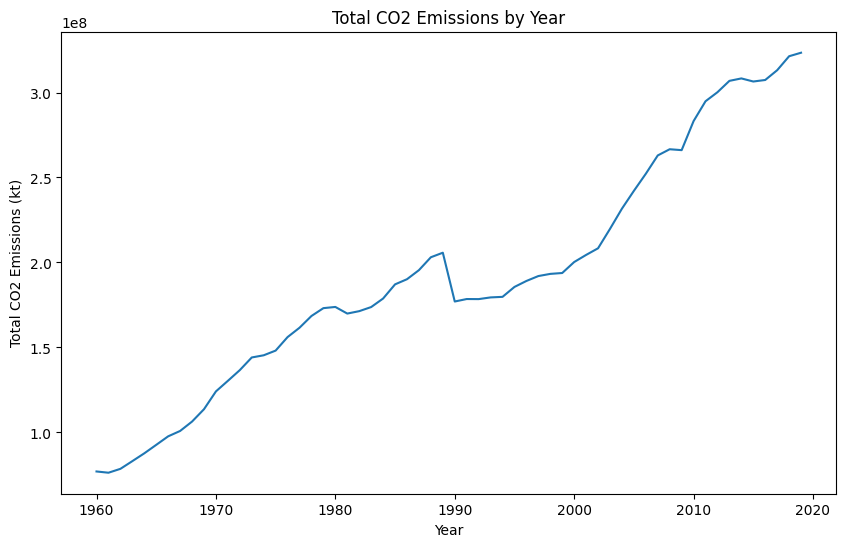

In [18]:
df_co2['year'] = pd.to_datetime(df_co2['year'], format='%Y')

#Calculate Total Emissions for World effects by years

total_emissions_year = df_co2.groupby('year')['value'].sum()

# Create a line plot to visualize the total emissions by year
plt.figure(figsize=(10, 6))
sns.lineplot(x=total_emissions_year.index, y=total_emissions_year.values)
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions (kt)')
plt.title('Total CO2 Emissions by Year')
plt.show()

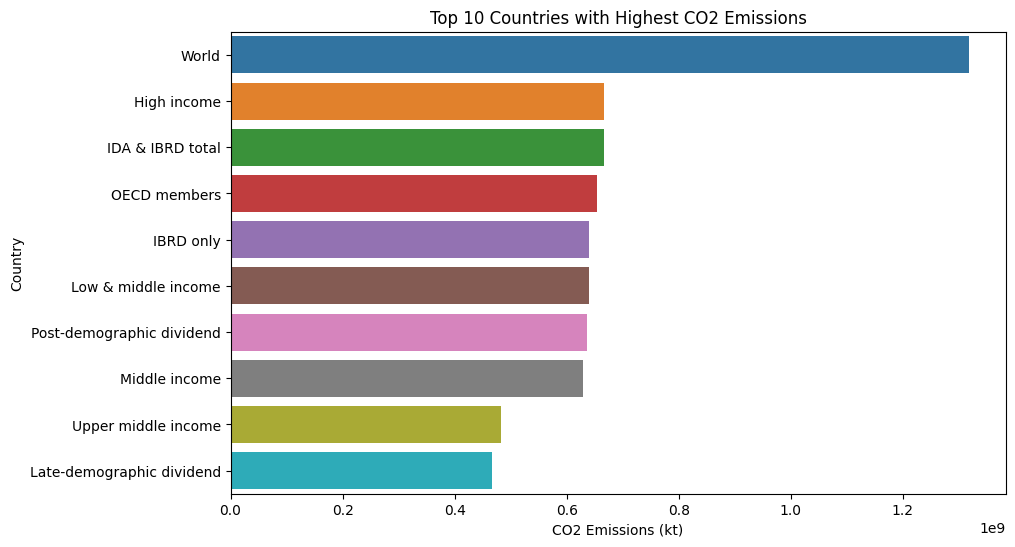

In [19]:
#Highest 10 co2 emissions countries¶
top_countries_emissions = df_co2.groupby('country_name')['value'].sum().nlargest(10)

# Create a bar plot to visualize the top 10 countries with the highest emissions
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries_emissions.values, y=top_countries_emissions.index)
plt.xlabel('CO2 Emissions (kt)')
plt.ylabel('Country')
plt.title('Top 10 Countries with Highest CO2 Emissions')
plt.show()

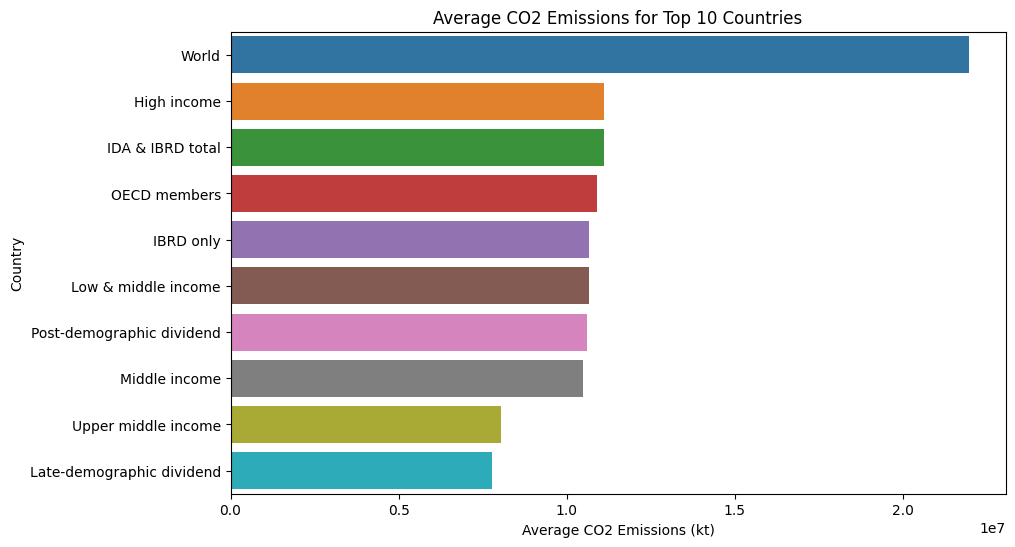

In [20]:
# Group the data by country and calculate the average CO2 emissions
average_emissions_country = df_co2.groupby('country_name')['value'].mean()

# Sort the average emissions in descending order and select the top 10 countries
top_10_countries = average_emissions_country.nlargest(10)

# Create a bar plot to visualize the average CO2 emissions for the top 10 countries
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_countries.values, y=top_10_countries.index)
plt.xlabel('Average CO2 Emissions (kt)')
plt.ylabel('Country')
plt.title('Average CO2 Emissions for Top 10 Countries')
plt.show()


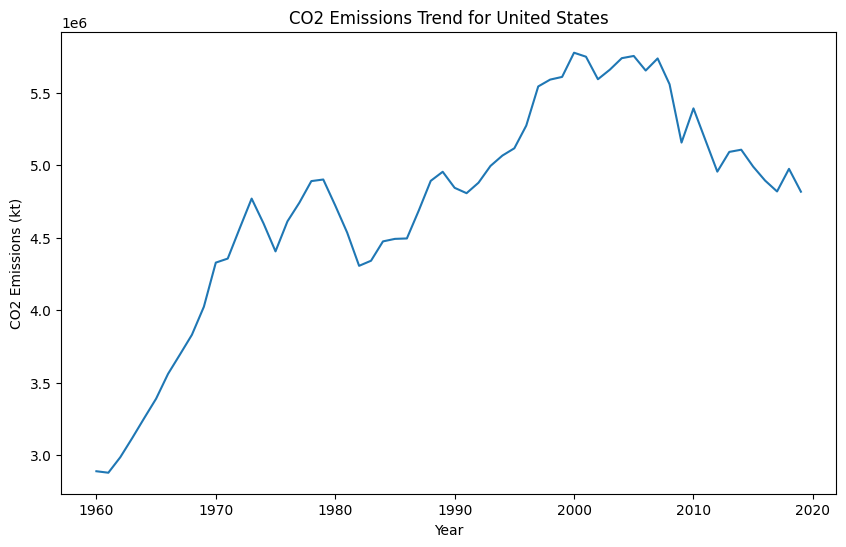

In [21]:
# USA CO2 emissions effect by years

country = 'United States'  # Choose a specific country for analysis

country_emissions = df_co2[df_co2['country_name'] == country].sort_values('year')

# Create a line plot to visualize the emissions trend over time for the country
plt.figure(figsize=(10, 6))
sns.lineplot(x=country_emissions['year'], y=country_emissions['value'])
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kt)')
plt.title(f'CO2 Emissions Trend for {country}')
plt.show()


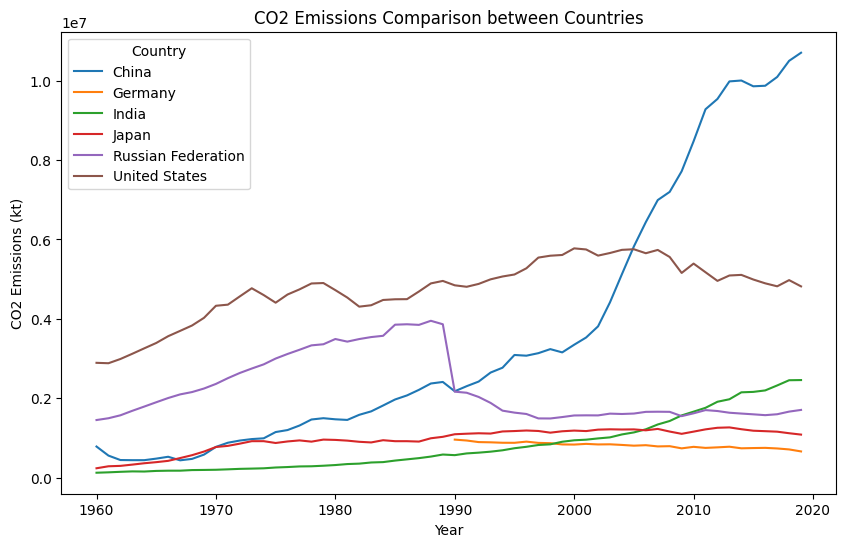

In [22]:
#The Biggest Industrial countries CO2 emissions by years
countries = ['China', 'United States', 'India', 'Russian Federation', 'Germany', 'Japan']  # Choose a list of countries for comparison

country_emissions_comparison = df_co2[df_co2['country_name'].isin(countries)]

# Create a line plot to compare the emissions between different countries
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='value', hue='country_name', data=country_emissions_comparison)
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kt)')
plt.title('CO2 Emissions Comparison between Countries')
plt.legend(title='Country')
plt.show()

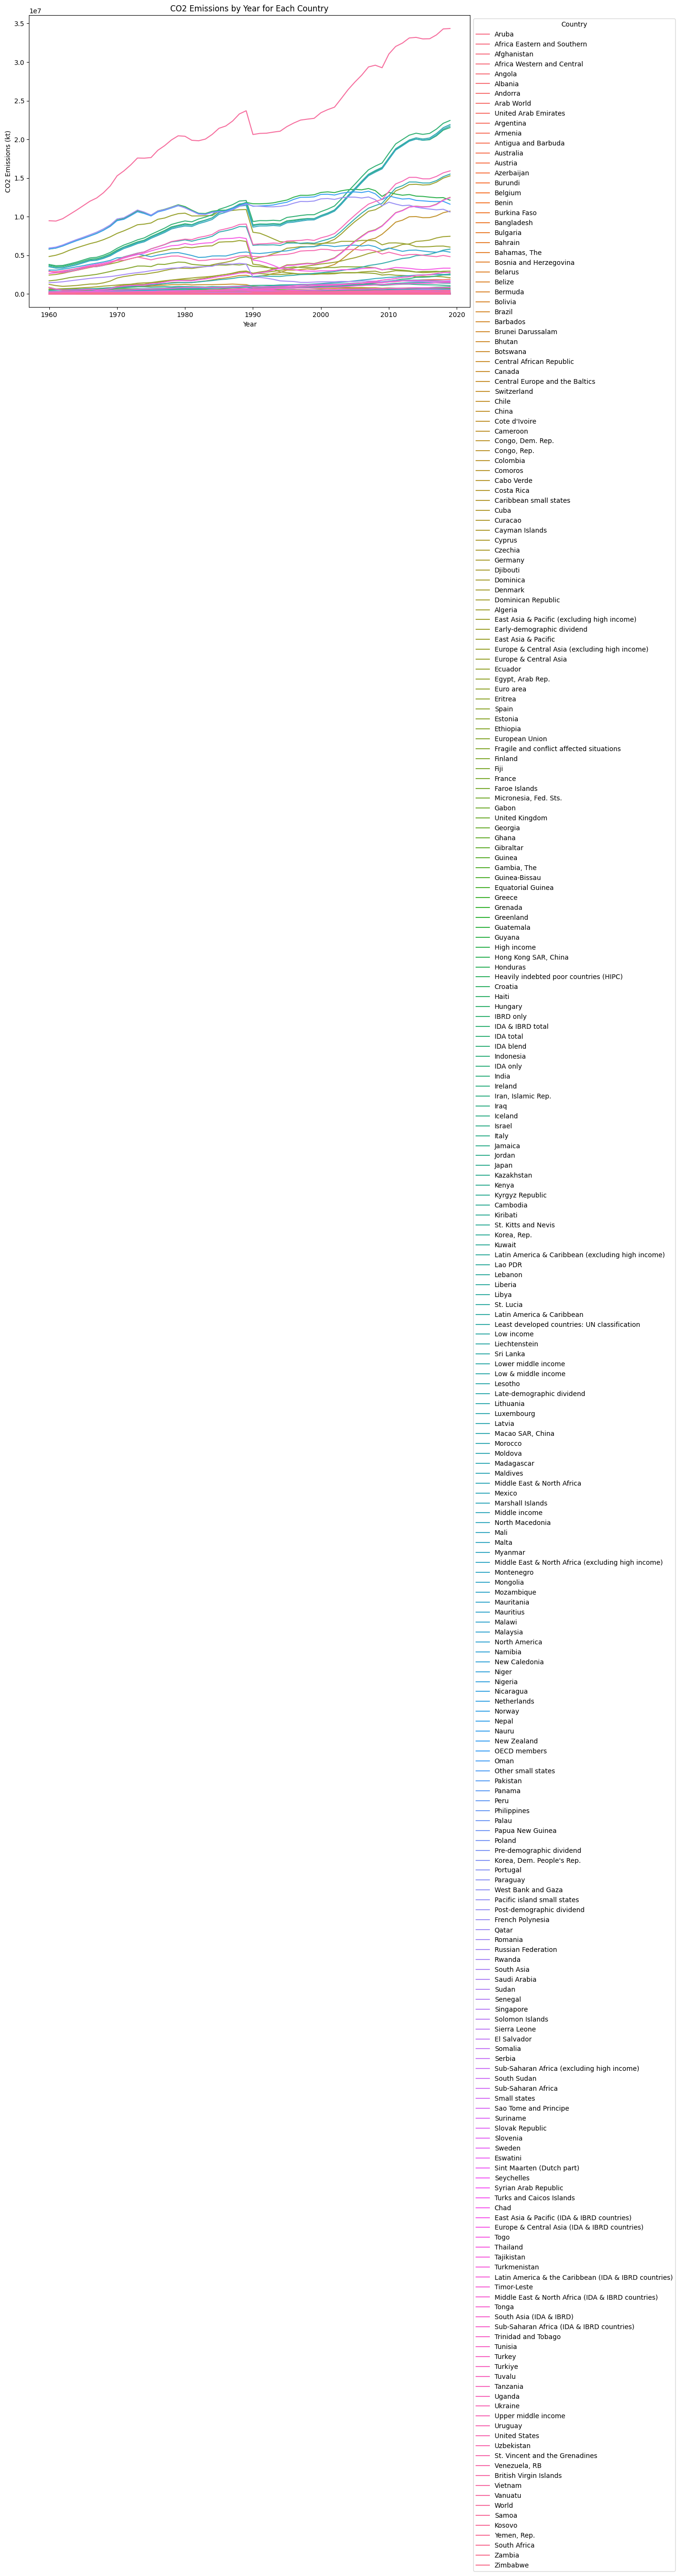

In [23]:



#CO2 emissions for all countries by years

plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='value', hue='country_name', data=df_co2)
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kt)')
plt.title('CO2 Emissions by Year for Each Country')
plt.legend(title='Country', bbox_to_anchor=(1, 1))
plt.show()

